In [1]:
import torch
import pandas as pd
import numpy as np

# Import dataset utils
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import importlib
if importlib.util.find_spec('ipywidgets') is not None:
    from tqdm.auto import tqdm
else:
    from tqdm import tqdm

In [2]:
dataframe = pd.read_csv('../data/df_suicidio_ansiedade_ability.csv', sep=',')
dataframe.head()

,Unnamed: 0,Chave,Alcoolatra,Droga,Suic_familia,Dep_familia,Alc_familia,Drog_familia,Neuro,psiquiatrica,...,TOC,Pontuação total,idade,Deprimido,sexo,Estado_civil,Tipo_Resid,Anos educacao formal,ability_suicidio,ability_suicidio_ansiedade
0,0,NDAR_INVLE566FK2,0,0,0,1,1,1,1,1,...,3,25,40,2,0,3,3,12,0.836013,1.173058
1,1,NDAR_INVMA818VXP,0,0,0,1,1,0,0,0,...,0,24,20,3,1,1,4,18,-0.028962,0.128593
2,2,NDAR_INVHY103MHY,0,0,1,1,0,1,0,0,...,0,19,20,2,1,1,1,12,-0.266992,0.090558
3,3,NDAR_INVEC849VWE,0,0,0,1,1,0,0,0,...,6,33,30,2,1,1,1,14,0.380615,0.847915
4,4,NDAR_INVHF792VJY,1,0,0,1,1,0,0,1,...,0,27,40,3,1,4,1,10,-0.171591,0.121865


# Taking a look at the data

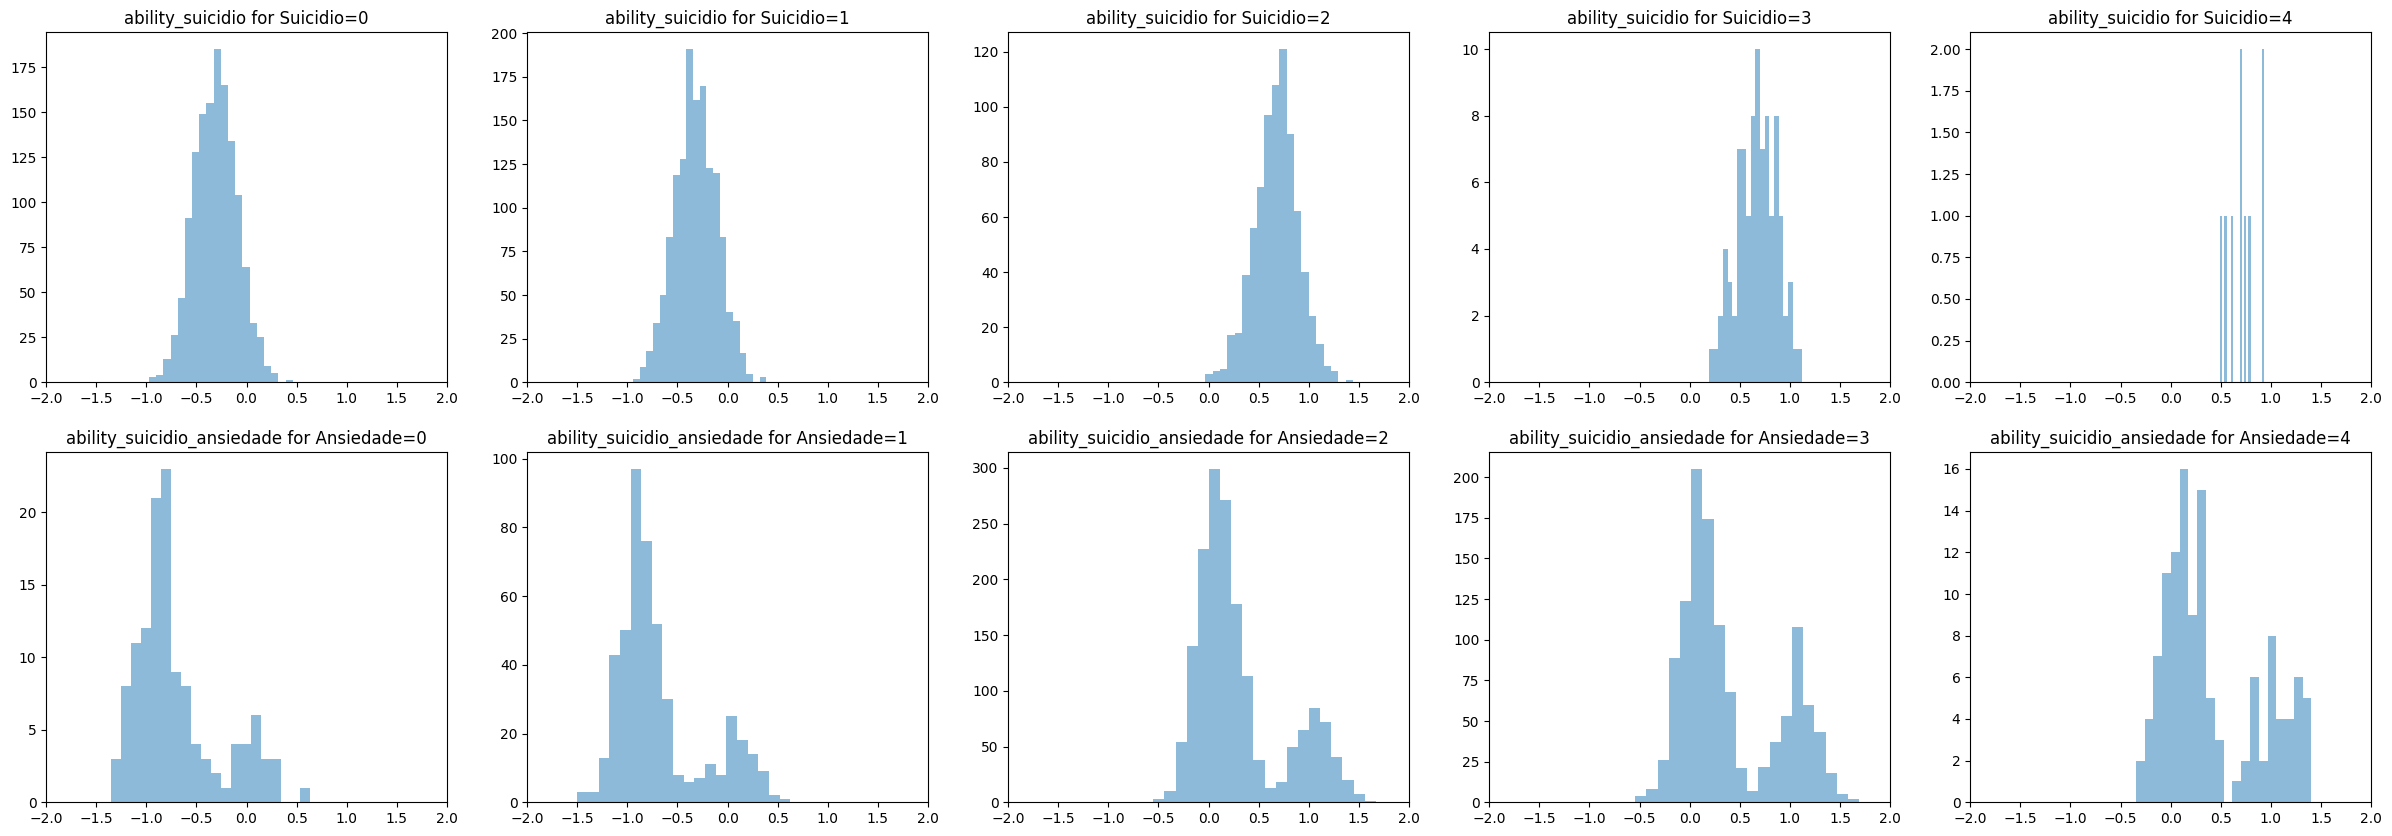

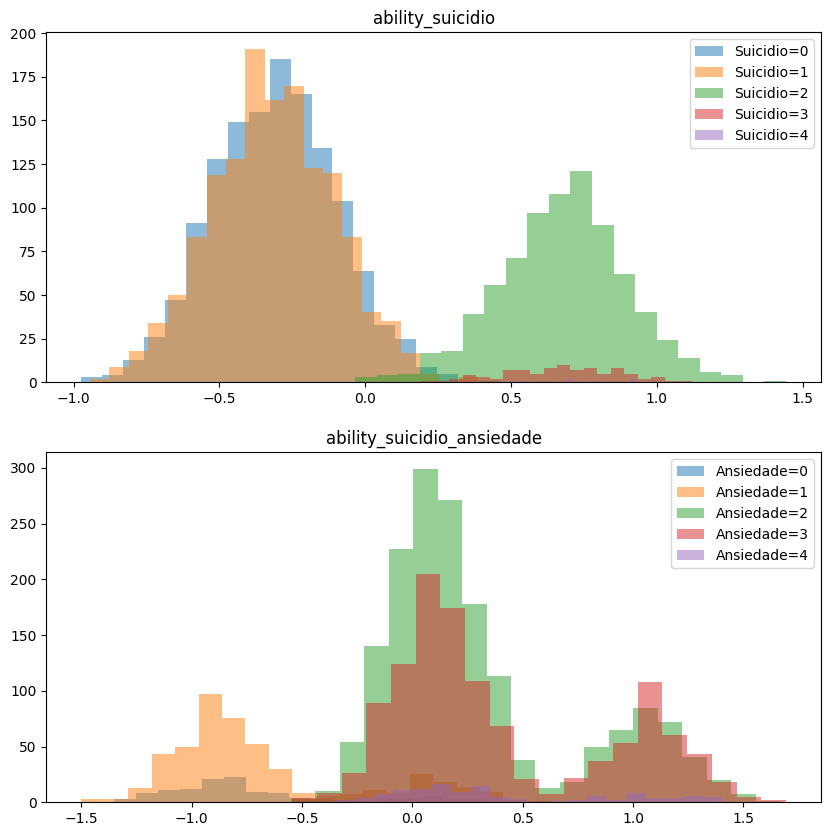

In [3]:
targets = ['Suicidio', 'Ansiedade']
abilitys = ['ability_suicidio', 'ability_suicidio_ansiedade']
uniques = [0,1,2,3,4]    

# plot in a grid of 2x2
fig, axs = plt.subplots(2, 5, figsize=(30, 10))
for i, val in enumerate(uniques):
    for j, target in enumerate(targets):
        indexes = dataframe[target] == val

        hist = np.histogram(dataframe[abilitys[j]][indexes], bins=20)

        # Plot bar
        axs[j][i].bar(hist[1][:-1], hist[0], width=hist[1][1]-hist[1][0] , align='edge', alpha=0.5)
        axs[j][i].set_title(abilitys[j] + ' for ' + target + '=' + str(val) )

        # set limits
        axs[j][i].set_xlim([-2, 2])


# Repeat the plot but overlay the histograms with alpha=0.2
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for i, target in enumerate(targets):
    for val in uniques:
        indexes = dataframe[target] == val
        vals = dataframe[abilitys[i]][indexes]

        hist = np.histogram(vals, bins=20)

        # Plot bar
        axs[i].bar(hist[1][:-1], hist[0], width=hist[1][1]-hist[1][0] , align='edge', alpha=0.5, label=target + '=' + str(val))
    
    axs[i].set_title(abilitys[i] + ' for ' + target + '=' + str(val) )
        




    axs[i].set_title(abilitys[i])
    axs[i].legend()


Text(0.5, 1.0, 'ability_suicidio_ansiedade')

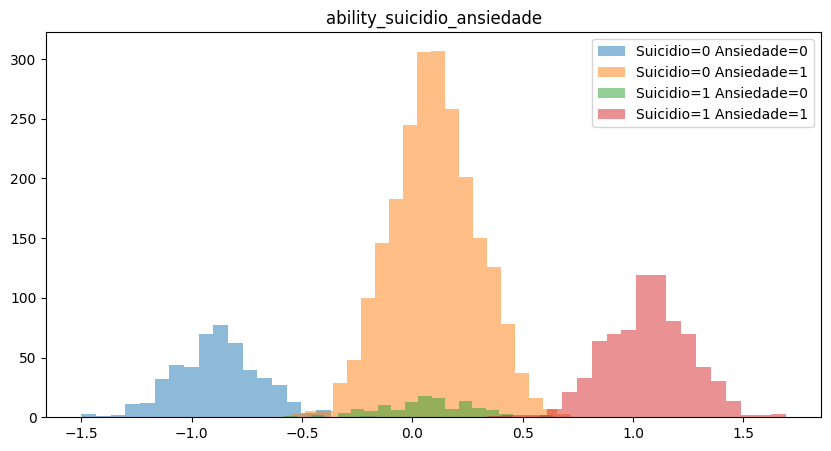

In [7]:
targets = ['Suicidio', 'Ansiedade']
ability = 'ability_suicidio_ansiedade'

dataframe_bin = dataframe.copy()
dataframe_bin['Suicidio'] = dataframe_bin['Suicidio'].apply(lambda x: 1 if x >= 2 else 0)
dataframe_bin['Ansiedade'] = dataframe_bin['Ansiedade'].apply(lambda x: 1 if x >= 2 else 0)

uniques = [[0,0], [0,1], [1,0], [1,1]]

# Repeat the plot but overlay the histograms with alpha=0.2
plt.figure(figsize=(10, 5))
for val in uniques:
    indexes = (dataframe_bin['Suicidio'] == val[0]) & (dataframe_bin['Ansiedade'] == val[1])
    vals = dataframe[abilitys[i]][indexes]

    hist = np.histogram(vals, bins=20)

    # Plot bar
    plt.bar(hist[1][:-1], hist[0], width=hist[1][1]-hist[1][0] , align='edge', alpha=0.5, label='Suicidio=' + str(val[0]) + ' Ansiedade=' + str(val[1]))

plt.legend()
plt.title(ability)
